<a href="https://colab.research.google.com/github/patilgauri005/Lab-works-/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0 | Loss: 2.8405
Epoch 50 | Loss: 0.4763
Epoch 100 | Loss: 0.3538
Epoch 150 | Loss: 0.2965
Epoch 200 | Loss: 0.2607
Epoch 250 | Loss: 0.2344
Epoch 300 | Loss: 0.2134
Epoch 350 | Loss: 0.1959
Epoch 400 | Loss: 0.1811
Epoch 450 | Loss: 0.1667

Final Accuracy: 100.00%


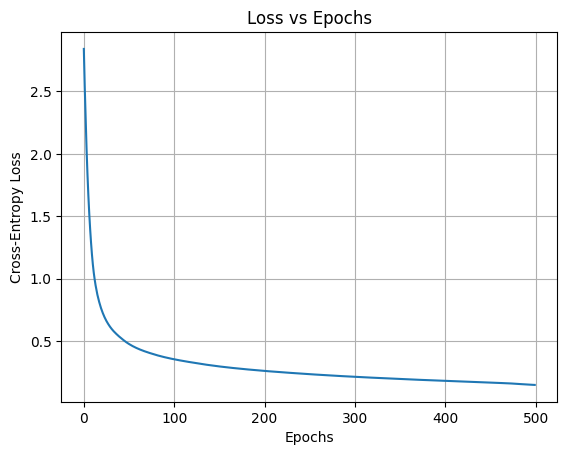

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt

# ---------------------------
# 1. Load and Preprocess Data
# ---------------------------
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode target
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train += np.random.normal(0, 0.2, X_train.shape)

# ---------------------------
# 2. Initialize Parameters
# ---------------------------
np.random.seed(42)
n_input = X_train.shape[1]
n_hidden = 8
n_output = y_train.shape[1]
lr = 0.05  # learning rate
epochs = 500

W1 = np.random.randn(n_input, n_hidden)
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, n_output)
b2 = np.zeros((1, n_output))

# ---------------------------
# 3. Define Helper Functions
# ---------------------------
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return expZ / expZ.sum(axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m

def accuracy(y_true, y_pred):
    y_true_cls = np.argmax(y_true, axis=1)
    y_pred_cls = np.argmax(y_pred, axis=1)
    return np.mean(y_true_cls == y_pred_cls)

# ---------------------------
# 4. Train the Model
# ---------------------------
losses = []

for epoch in range(epochs):
    # Forward Propagation
    Z1 = np.dot(X_train, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)

    # Compute Loss
    loss = cross_entropy_loss(y_train, A2)
    losses.append(loss)

    # Backward Propagation
    m = X_train.shape[0]
    dZ2 = A2 - y_train
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X_train.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Update Weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    # Print Progress
    if epoch % 50 == 0:
        print(f"Epoch {epoch} | Loss: {loss:.4f}")

# ---------------------------
# 5. Evaluate the Model
# ---------------------------
Z1_test = np.dot(X_test, W1) + b1
A1_test = relu(Z1_test)
Z2_test = np.dot(A1_test, W2) + b2
A2_test = softmax(Z2_test)

acc = accuracy(y_test, A2_test)
print(f"\nFinal Accuracy: {acc * 100:.2f}%")

# ---------------------------
# 6. Plot Loss Curve
# ---------------------------
plt.plot(losses)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cross-Entropy Loss")
plt.grid(True)
plt.show()


In [ ]:
---------------------------------------------
Step 1: Import numpy, pandas, sklearn.
Step 2: Load and preprocess Iris dataset.
Step 3: Initialize weights and biases randomly.
Step 4: Perform Forward Propagation:
        - Compute Z1 = X·W1 + b1
        - Apply activation function (ReLU / Sigmoid  )
        - Compute Z2 = A1·W2 + b2
        - Apply Softmax to get output probabilities.
Step 5: Compute loss using Cross Entropy.
Step 6: Perform Backward Propagation:
        - Compute gradients dW1, dW2, db1, db2
        - Update weights using learning rate.
Step 7: Repeat Steps 4–6 for many epochs.
Step 8: Predict on test data.
Step 9: Evaluate accuracy.
Step 10: Plot Loss vs Epoch graph.
---------------------------------------------